<a href="https://colab.research.google.com/github/masfudindc/Machine_Learning/blob/main/Tugas_Praktikum_ML_Week03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING**

##Tugas Praktikum Modul 03 - Regression


---


##Masfudin Dwi Cahyo
##2141720010
##TI-3D


---



**Tugas 1 - Multiple Linear Regression**

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).
2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.
3. Lakukan feature scaling jika diperlukan.
4. Buat model multiple linear regression menggunakan Scikit-Learn.
5. Latih model pada data latih dan lakukan prediksi pada data uji.
6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.


---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



---

# **1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).**

In [3]:
# mengimpor library numpy dan pandas
import numpy as np
import pandas as pd     #untuk memuat data

In [15]:
# memuat data dari file insurance.csv
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Week 03/tugas/insurance.csv')
data.head(10)     #menampilkan data berjumlah 10 (dafault hanya 5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [16]:
# informasi data
data.info()

print()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB



,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [23]:
# mengimpor library scikit-learn (LabelEncoder) sebagai encoder/perubah nilai string menjadi integer
from sklearn.preprocessing import LabelEncoder

In [24]:
# membuat objek dari LabelEncoder
le = LabelEncoder()

# encoding kolom 'sex'
data['sex'] = le.fit_transform(data['sex'])
# encoding kolom 'smoker'
data['smoker'] = le.fit_transform(data['smoker'])
# encoding kolom 'region'
data['region'] = le.fit_transform(data['region'])

data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


-

Pada data Insurance, kolom-kolom yang relevan untuk digunakan sebagai variabel adalah kolom "age", "sex", "bmi", "children", dan "smoker" sebagai variabel bebas(fitur). Lalu kolom "charges" sebagai variabel target(biaya medis personal).

Kolom "region" kurang relevan jadi tidak digunakan pada variabel bebas.

In [25]:
# memisahkan variabel bebas(X) dan variabel target(y)
X = data[['age', 'sex', 'bmi', 'children', 'smoker']]
y = data['charges']



---

# **2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.**

In [21]:
# mengimpor library sckit-learn (train_test_split) untuk membagu data menjadi data latih dan data uji
# X_train, X_test, y_train, y_test

from sklearn.model_selection import train_test_split

In [22]:
# membagi dataset menjadi data latih(train) dan data uji(test)
# rasio data latih dan data uji 80:20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#random_state=42 hanya untuk pemisah data secara acak




---

# **3. Lakukan feature scaling jika diperlukan.**

In [28]:
# mengimpor library scikit-learn (StandardScaler) untuk menormalkan fitur-fitur dengan menghilangkan rata-rata
from sklearn.preprocessing import StandardScaler

#membuat objek dari StandardScaler
scaler = StandardScaler()

In [29]:
# melakukan feature scaling pada data latih
X_train_scaled = scaler.fit_transform(X_train)

# melakukan feature scaling pada data latih
X_test_scaled = scaler.fit_transform(X_test)



---

# **4. Buat model multiple linear regression menggunakan Scikit-Learn.**

In [30]:
# mengimpor library scikit-learn (LinearRegression) untuk memodelkan hubungan antar variabel
from sklearn.linear_model import LinearRegression

# membuat objek dari LinearRegression
model = LinearRegression()



---

# **5. Latih model pada data latih dan lakukan prediksi pada data uji.**

In [31]:
# melatih model pada data latih
model.fit(X_train_scaled, y_train)

# menguji kinerja model pada data uji
y_pred = model.predict(X_test_scaled)



---

# **6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.**

Keterangan :

Mean Squared Error (MSE)

Mean Absolute Error (MAE)

In [32]:
# mengimpor library scikit-learn
# r2_score untuk menghitung koefisien determinasi R^2
# mean_squared_error untuk menghitung rata-rata kesalahan kuadrat antara nilai aktual dan nilai yang diprediksi oleh model
# mean_absolute_error untuk menghitung rata-rata kesalahan absolut

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [33]:
# menghitung R-Squared
r2_MDC = r2_score(y_test, y_pred)

# menghitung MSE
mse_MDC = mean_squared_error(y_test, y_pred)

# menghitung MAE
mae_MDC = mean_absolute_error(y_test, y_pred)

In [34]:
# menampilkan hasil evaluasi
print('R-Squared : ', r2_MDC)
print('MSE : ', mse_MDC)
print('MAE : ', mae_MDC)

R-Squared :  0.7810112863132488
MSE :  33997720.0108833
MAE :  4217.267958976158




---

# **Visualisasi**

In [35]:
# mengimpor library matplotlib untuk membuat grafik
import matplotlib.pyplot as plt

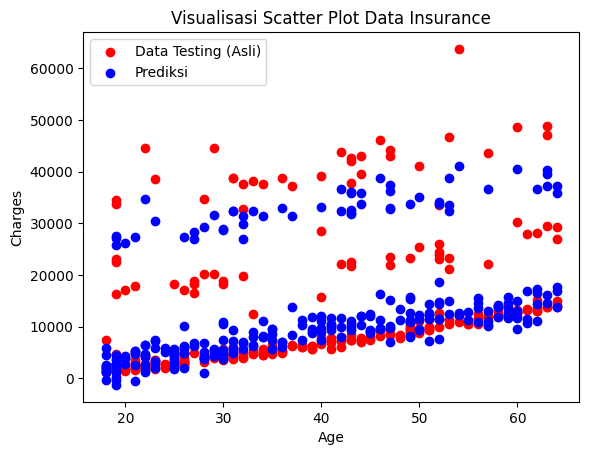

In [52]:
# KOLOM AGE

# membuat scatter plot
plt.scatter(X_test['age'], y_test, c='red', label='Data Testing (Asli)')
plt.scatter(X_test['age'], y_pred, c='blue', label='Prediksi')

# menambah label sumbu x dan y
plt.xlabel('Age')    #variabel independen (fitur)
plt.ylabel('Charges')   #variabel dependen (target)

# judul plot
plt.title('Visualisasi Scatter Plot Data Insurance')

plt.legend()
plt.show()

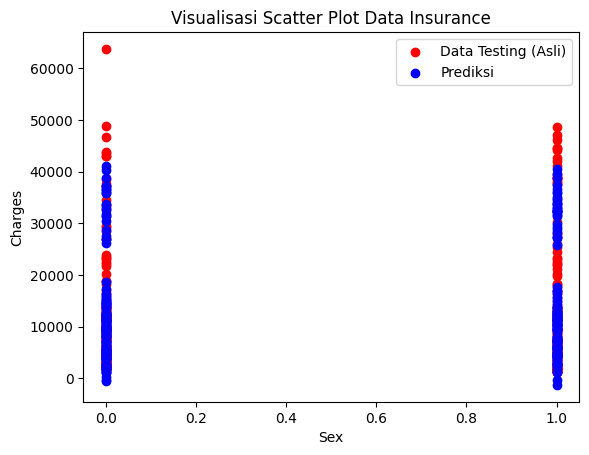

In [53]:
# KOLOM SEX

# membuat scatter plot
plt.scatter(X_test['sex'], y_test, c='red', label='Data Testing (Asli)')
plt.scatter(X_test['sex'], y_pred, c='blue', label='Prediksi')

# menambah label sumbu x dan y
plt.xlabel('Sex')    #variabel independen (fitur)
plt.ylabel('Charges')   #variabel dependen (target)

# judul plot
plt.title('Visualisasi Scatter Plot Data Insurance')

plt.legend()
plt.show()

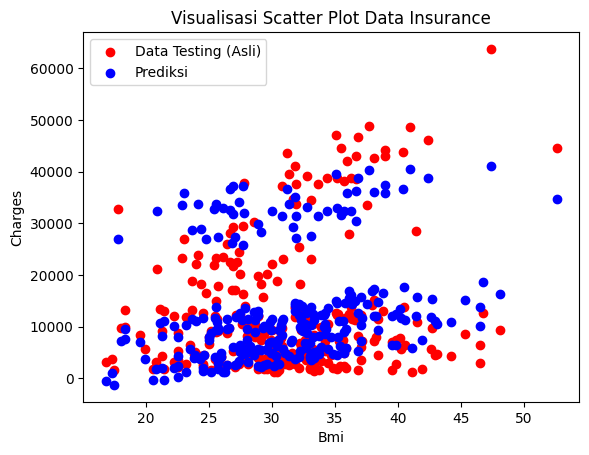

In [54]:
# KOLOM BMI

# membuat scatter plot
plt.scatter(X_test['bmi'], y_test, c='red', label='Data Testing (Asli)')
plt.scatter(X_test['bmi'], y_pred, c='blue', label='Prediksi')

# menambah label sumbu x dan y
plt.xlabel('Bmi')    #variabel independen (fitur)
plt.ylabel('Charges')   #variabel dependen (target)

# judul plot
plt.title('Visualisasi Scatter Plot Data Insurance')

plt.legend()
plt.show()

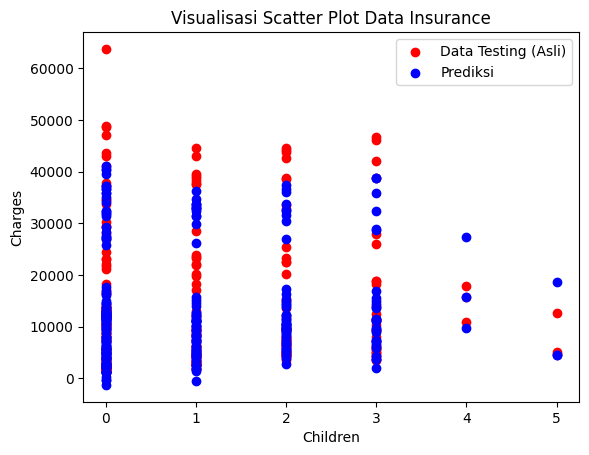

In [55]:
# KOLOM CHILDREN

# membuat scatter plot
plt.scatter(X_test['children'], y_test, c='red', label='Data Testing (Asli)')
plt.scatter(X_test['children'], y_pred, c='blue', label='Prediksi')

# menambah label sumbu x dan y
plt.xlabel('Children')    #variabel independen (fitur)
plt.ylabel('Charges')   #variabel dependen (target)

# judul plot
plt.title('Visualisasi Scatter Plot Data Insurance')

plt.legend()
plt.show()

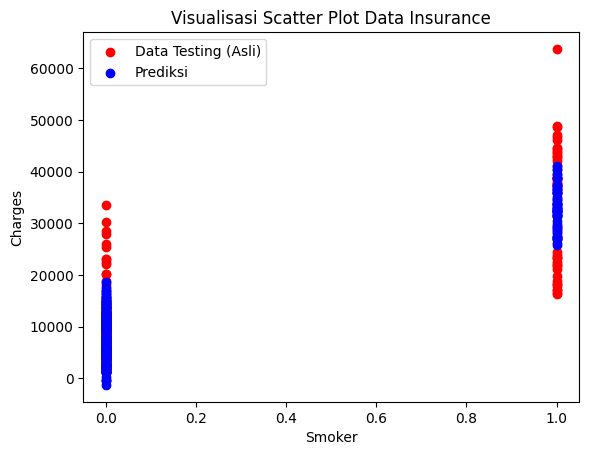

In [56]:
# KOLOM SMOKER

# membuat scatter plot
plt.scatter(X_test['smoker'], y_test, c='red', label='Data Testing (Asli)')
plt.scatter(X_test['smoker'], y_pred, c='blue', label='Prediksi')

# menambah label sumbu x dan y
plt.xlabel('Smoker')    #variabel independen (fitur)
plt.ylabel('Charges')   #variabel dependen (target)

# judul plot
plt.title('Visualisasi Scatter Plot Data Insurance')

plt.legend()
plt.show()